# Temperature-dependent parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
# To center the output plots

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Open-circuit Potential

In [4]:
OCV = pd.read_csv('OCV_Temp25.txt',delimiter=r"\s+") # Space separated, not tab separated
print(OCV)
print('*'*100)
OCV_conc = OCV.loc[:,'x']
OCV_V = OCV.loc[:,'OCV']


          x     OCV
0   0.28051  4.1836
1   0.31022  4.1511
2   0.34024  4.1237
3   0.37025  4.0922
4   0.40027  4.0655
5   0.43028  4.0419
6   0.46030  4.0141
7   0.49000  3.9895
8   0.52002  3.9749
9   0.55003  3.9596
10  0.58005  3.9464
11  0.61006  3.9318
12  0.64008  3.9225
13  0.67009  3.9118
14  0.70011  3.9068
15  0.73012  3.9021
16  0.76014  3.8958
17  0.79015  3.8934
18  0.82017  3.8835
19  0.85018  3.8782
20  0.88020  3.8673
21  0.91021  3.8363
22  0.94023  3.7783
23  0.97024  3.6098
24  0.98066  3.1891
25  0.98157  3.1169
26  0.98238  3.0026
****************************************************************************************************


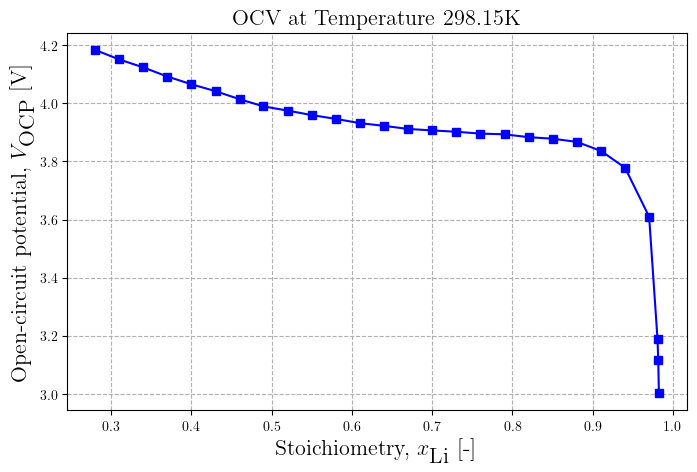

In [5]:
plt.figure(figsize=(8,5), dpi=100) # Always use this command first before other commands
plt.grid(which='major',linestyle='--')
plt.title(r"OCV at Temperature 298.15K", fontsize=16)
plt.plot(OCV_conc, OCV_V, 'bs-') #fmt notations must come before labels
plt.xlabel(r'Stoichiometry, $x_\textrm{Li}$ [-]',fontsize=16)
plt.ylabel(r'Open-circuit potential, $V_\textrm{OCP}$ [V]',fontsize=16)
plt.show()

## Diffusion coefficient

In [6]:
Diff25 = pd.read_csv('Diff_Temp25.txt',delimiter=r"\s+") # Space separated, not tab separated
Diff25

,x,diff
0,0.270,1.960000e-13
1,0.420,1.530000e-13
2,0.500,1.030000e-13
3,0.530,9.940000e-14
4,0.570,7.220000e-14
5,0.650,1.030000e-14
6,0.790,1.930000e-14
7,0.865,2.760000e-14


In [7]:
Diff25_conc = Diff25.loc[:,'x']
Diff25_diff = Diff25.loc[:,'diff']

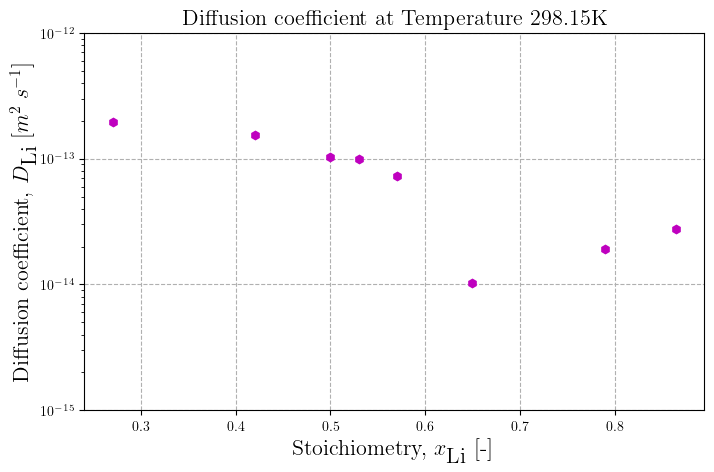

In [8]:
from matplotlib import pyplot # Need this module for log scale


plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.title(r"Diffusion coefficient at Temperature 298.15K", fontsize=16)
plt.plot(Diff25_conc, Diff25_diff, 'mh')



plt.xlabel(r'Stoichiometry, $x_\textrm{Li}$ [-]',fontsize=16)
plt.ylabel(r'Diffusion coefficient, $D_\textrm{Li}$ [$m^2\;s^{-1}$]',fontsize=16)
plt.yscale('log')
plt.ylim((10**-15,10**-12))
plt.show()

## Entropic heat coefficient

In [9]:
dUdT_raw = pd.read_csv('dUdT.txt',delimiter=r"\s+")
dUdT_raw

,x,dUdT
0,0.34391,-0.000164
1,0.38033,-0.000200
2,0.41676,-0.000238
3,0.45319,-0.000268
4,0.48962,-0.000313
5,0.52605,-0.000347
6,0.56247,-0.000378
7,0.59911,-0.000445
8,0.63553,-0.000450
9,0.67196,-0.000544


In [10]:
dUdT_conc = dUdT_raw.loc[:,'x']
dUdT = dUdT_raw.loc[:,'dUdT']

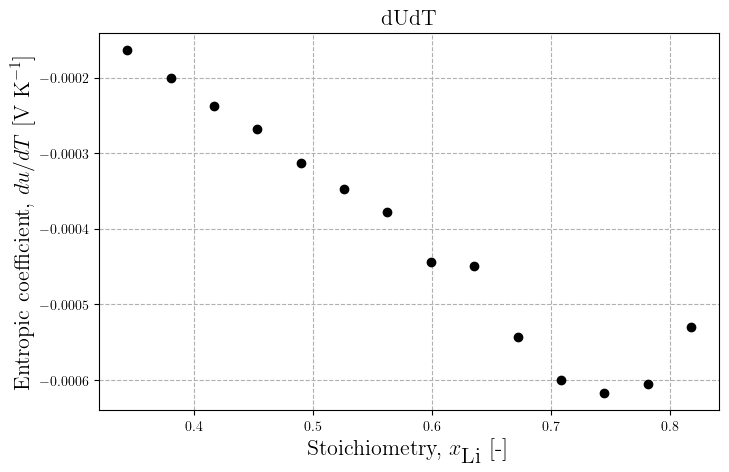

In [11]:
plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.title(r"dUdT", fontsize=16)
plt.plot(dUdT_conc, dUdT, 'ko')
plt.xlabel(r'Stoichiometry, $x_\textrm{Li}$ [-]',fontsize=16)
plt.ylabel(r'Entropic coefficient, $du/dT$ [$\textrm{V}\;\textrm{K}^{-1}$]',fontsize=16)
plt.show()

## Electrolyte conductivity

In [12]:
# Required modules for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
# Raw data
sigma_temp_raw = pd.read_csv('sigma_temp.txt',delimiter=r"\s+")
sigma_temp_raw

,T,sigma
0,298.15,0.000003
1,308.15,0.000005
2,318.15,0.000014
3,328.15,0.000030


In [14]:
Temp_inv = 1/sigma_temp_raw.loc[:,'T']

print('x-axis: 1/Temperature in 1/Kelvin')
print(1/Temp_inv)




x-axis: 1/Temperature in 1/Kelvin
0    298.15
1    308.15
2    318.15
3    328.15
Name: T, dtype: float64


In [15]:
sigma_ref = sigma_temp_raw.loc[0,'sigma'] # Electrolyte conductivity at Temperature 25
print('The reference conductivity at 298.15K = {sigma_temp25} S/cm'.format(sigma_temp25 = sigma_ref))
# print(sigma_ref)
print('  '*100)
print('y-axis: ln(sigma/sigma_ref)')

sigma_temp = np.log(sigma_temp_raw.loc[:,'sigma']/sigma_ref)
print(sigma_temp)

The reference conductivity at 298.15K = 2.7562999999999998e-06 S/cm
                                                                                                                                                                                                        
y-axis: ln(sigma/sigma_ref)
0    0.000000
1    0.677589
2    1.653756
3    2.381190
Name: sigma, dtype: float64


In [16]:
# Linear regression to plot the Arrhenius curve

regr = LinearRegression()  
Temp_train = np.array(Temp_inv).reshape(-1,1) # Need to reshape the array before the linear regression
sigma_temp_train = np.array(sigma_temp).reshape(-1,1)
regr.fit(Temp_train,sigma_temp_train)

sigma_temp_pred = regr.predict(Temp_train)
print('Predicted electrolyte conductivity')
print(sigma_temp_pred)

Predicted electrolyte conductivity
[[-0.06446176]
 [ 0.79930747]
 [ 1.60877721]
 [ 2.36891159]]


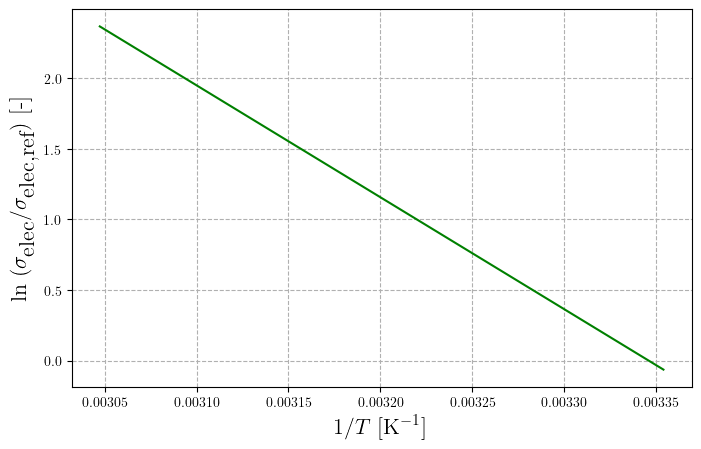

Coefficients: [[-7935.87313297]]
Mean Absolute Error: 0.06085902382564662
Mean Squared Error: 0.005286100895048266
Root Mean Squared Error: 0.07270557678093384


In [17]:
# Check regressed data:

plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.plot(Temp_inv, sigma_temp_pred, 'g-')
plt.xlabel(r'$1/T$ [$\textrm{K}^{-1}$]',fontsize=16)
plt.ylabel(r'ln ($\sigma_\textrm{elec}$/$\sigma_\textrm{elec,ref}$) [-]',fontsize=16)
plt.show()

# The coefficients and errors
print('Coefficients:', regr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(sigma_temp, sigma_temp_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(sigma_temp, sigma_temp_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(sigma_temp, sigma_temp_pred)))

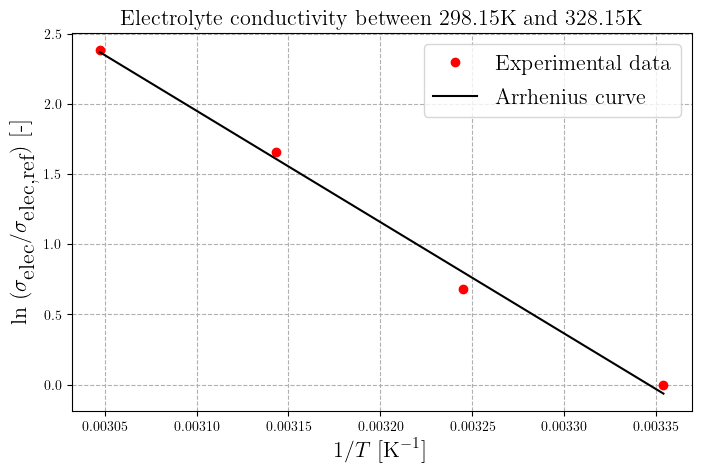

In [18]:
plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.title(r"Electrolyte conductivity between 298.15K and 328.15K", fontsize=16)
plt.plot(Temp_inv, sigma_temp, 'ro', label = r'Experimental data')
plt.plot(Temp_inv, sigma_temp_pred, 'k-', label = r'Arrhenius curve')
plt.xlabel(r'$1/T$ [$\textrm{K}^{-1}$]',fontsize=16)
plt.ylabel(r'ln ($\sigma_\textrm{elec}$/$\sigma_\textrm{elec,ref}$) [-]',fontsize=16)
plt.legend(loc=1, prop={'size': 16}) #loc modifies the location of the legend, prop modifies the size of the legend
plt.show()

## Exchange current densities at the NE-SE interface

In [19]:
# Raw data
i0_neg_raw = pd.read_csv('i0_neg.txt',delimiter=r"\s+")
i0_neg_raw

,T,i0_neg
0,298.15,1.4059
1,308.15,2.6331
2,318.15,9.3690
3,328.15,37.7980


In [20]:
i0_neg_ref = i0_neg_raw.loc[0,'i0_neg']  # Exchange current density at Temp_inv 25
print('The reference exchange current density at the NE-PE interface at 298.15K = {i0_neg_Temp25} mA/cm^2'.format(i0_neg_Temp25 = i0_neg_ref))
print('  '*100)
print('y-axis: ln(i0/i0_neg_ref)')

i0_neg_temp = np.log(i0_neg_raw.loc[:,'i0_neg']/i0_neg_ref)
print(i0_neg_temp)

The reference exchange current density at the NE-PE interface at 298.15K = 1.4059 mA/cm^2
                                                                                                                                                                                                        
y-axis: ln(i0/i0_neg_ref)
0    0.000000
1    0.627484
2    1.896729
3    3.291579
Name: i0_neg, dtype: float64


In [21]:
# Linear regression to plot the Arrhenius curve

regr = LinearRegression()  
Temp_train = np.array(Temp_inv).reshape(-1,1)
i0_neg_temp_train = np.array(i0_neg_temp).reshape(-1,1)
regr.fit(Temp_train,i0_neg_temp_train)

i0_neg_temp_pred = regr.predict(Temp_train)
print('Predicted exchange current density')
print(i0_neg_temp_pred)

Predicted exchange current density
[[-0.24464431]
 [ 0.93610339]
 [ 2.04262524]
 [ 3.08170709]]


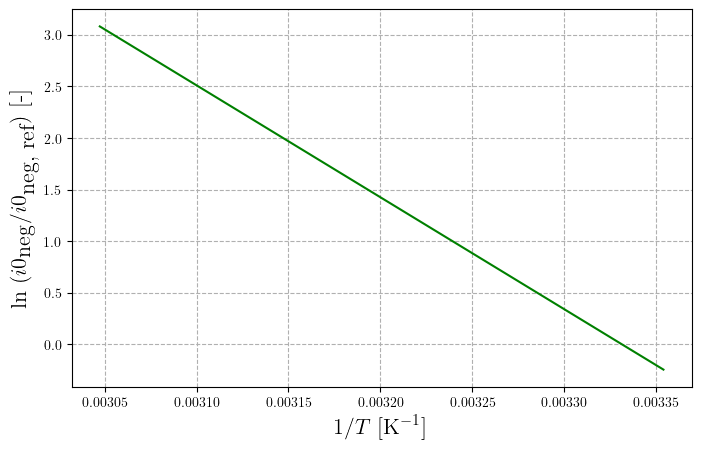

Coefficients: [[-10848.11035852]]
Mean Absolute Error: 0.22725787118756047
Mean Squared Error: 0.055107116981890705
Root Mean Squared Error: 0.2347490510777215


In [22]:
# Check regressed data:

plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.plot(Temp_inv, i0_neg_temp_pred, 'g-')
plt.xlabel(r'$1/T$ [$\textrm{K}^{-1}$]',fontsize=16)
plt.ylabel(r'ln ($i0_\textrm{neg}$/$i0_\textrm{neg, ref}$) [-]',fontsize=16)
plt.show()

# The coefficients and errors
print('Coefficients:', regr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(i0_neg_temp, i0_neg_temp_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(i0_neg_temp, i0_neg_temp_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(i0_neg_temp, i0_neg_temp_pred)))

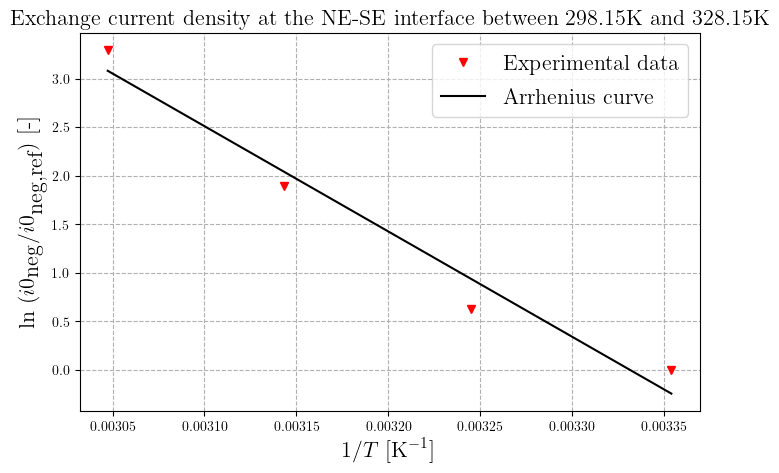

In [23]:
plt.figure(figsize=(8,5), dpi=100)
plt.grid(which='major',linestyle='--')
plt.title(r"Exchange current density at the NE-SE interface between 298.15K and 328.15K", fontsize=16)
plt.plot(Temp_inv, i0_neg_temp, 'rv', label =r'Experimental data')
plt.plot(Temp_inv, i0_neg_temp_pred, 'k-', label =r'Arrhenius curve')
plt.xlabel(r'$1/T$ [$\textrm{K}^{-1}$]',fontsize=16)
plt.ylabel(r'ln ($i0_\textrm{neg}$/$i0_\textrm{neg,ref}$) [-]',fontsize=16)
plt.legend(loc=1, prop={'size': 16})
plt.show()

## Rate-constants at the SE-PE interface

In [24]:
# Raw data
kpos = pd.read_csv('kpos_fit.txt',delimiter=r"\s+")
kpos

,T,kpos
0,298.15,0.000013
1,308.15,0.000053
2,318.15,0.000063
3,328.15,0.000073


In [25]:
Temp = kpos.loc[:,'T']
kpos_temp = kpos.loc[:,'kpos']

In [26]:
# The relationship of rate-constant at different temperatures can be described with a polynomial function

p = np.poly1d(np.polyfit(Temp, kpos_temp, 2))
Tempint = np.linspace(298.15, 328.15, 10)


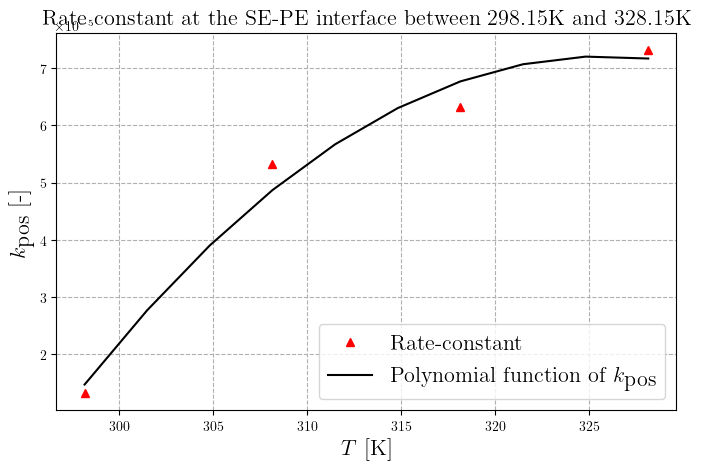

In [27]:
plt.figure(figsize=(8,5), dpi=100) # Always use this command first before other commands
plt.grid(which='major',linestyle='--')
plt.title(r"Rate constant at the SE-PE interface between 298.15K and 328.15K \newline", fontsize=16)

plt.plot(Temp, kpos_temp, 'r^', label=r"Rate-constant") # The rate-constant
plt.plot(Tempint, p(Tempint), 'k-', label= r'Polynomial function of $k_\textrm{pos}$') # The polynominal function

plt.xlabel(r'$T$ [K]',fontsize=16)
plt.ylabel(r'$k_\textrm{pos}$ [-]',fontsize=16)
plt.legend(loc=4, prop={'size': 16})
plt.show()